# Tech layoffs from COVID 19 to present 

The dataset for this project is taken from kaggle.com. This dataset shows the basic information about layoffs among tech companies since the start of the pandemic till nowadays. Using this data I will try to look into analyzing recent tech turmoil and discover useful insights. To create this project I'll use pandas library to read and handle CSV file, also for visualization I'll require matplotlib and seaborn to show you some plots, graphs and bars.  


## Downloading the Dataset

First, I download CSV file from Kaggle on my laptop, then I upload it on the Juputer notebook. Then I give my project name and save this notebook on Jovian.

In [3]:
project_name = "tech-layoffs-from-covid_19-to-presentd-data-analysis" 

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis


'https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis'

## Data Preparation and Cleaning

Here I will handle CSV file: load it into a data frame using Pandas, show some basic information about this data and operate with this data.



 CSV file is already uploaded. Using Pandas, let's load the dataset into a data frame and give it a name.

In [62]:
import pandas as pd
layoffs_df = pd.read_csv('layoffs.csv')

 Let's explore some basic information about our dataset.

In [63]:
layoffs_df.info()
layoffs_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1801 non-null   object 
 1   location             1801 non-null   object 
 2   industry             1795 non-null   object 
 3   total_laid_off       1265 non-null   float64
 4   percentage_laid_off  1216 non-null   float64
 5   date                 1800 non-null   object 
 6   stage                1797 non-null   object 
 7   country              1801 non-null   object 
 8   funds_raised         1667 non-null   float64
dtypes: float64(3), object(6)
memory usage: 126.8+ KB


,total_laid_off,percentage_laid_off,funds_raised
count,1265.000000,1216.000000,1667.000000
mean,195.061660,0.273900,853.822613
std,559.671479,0.264999,6272.643880
min,3.000000,0.000000,0.000000
25%,31.000000,0.100000,45.000000
50%,70.000000,0.180000,137.000000
75%,150.000000,0.320000,393.000000
max,11000.000000,1.000000,121900.000000


This information shows us that there are 9 columns and 1801 raws, type of each value in every column and some statistical information. Also it shows the type of the dataset: `pandas.core.frame.DataFrame`.

Let's count how many different companies are there.

In [64]:
companies_count = layoffs_df.company.unique()
len(companies_count)

1498

The type of list of unique companies is numpy.ndarray, so we can just count the values within the array.

In [65]:
type(companies_count)

numpy.ndarray

Here is a list of top 10 layoffs. As we can see, all of them happened in 2020 or 2022 years. 

In [66]:
layoffs_df.sort_values('total_laid_off', ascending = False).head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
216,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,IPO,United States,26000.0
151,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,IPO,United States,108.0
1224,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30,Acquired,Netherlands,NaN
152,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16,IPO,United States,2.0
246,Twitter,SF Bay Area,Consumer,3700.0,0.50,2022-11-04,IPO,United States,12900.0
1373,Uber,SF Bay Area,Transportation,3700.0,0.14,2020-05-06,IPO,United States,24700.0
1328,Uber,SF Bay Area,Transportation,3000.0,0.13,2020-05-18,IPO,United States,24700.0
1104,Better.com,New York City,Real Estate,3000.0,0.33,2022-03-08,Unknown,United States,905.0
1117,Peloton,New York City,Fitness,2800.0,0.20,2022-02-08,IPO,United States,1900.0
1528,Groupon,Chicago,Retail,2800.0,0.44,2020-04-13,IPO,United States,1400.0


I convert a 'date' column into a datetime type instead of object and add new columns in our data frame so the data now can be grouped by year, month or day, using `.to_datetime`.

In [67]:
layoffs_df['date'] = pd.to_datetime(layoffs_df.date)
layoffs_df['Year'] = pd.DatetimeIndex(layoffs_df.date).year
layoffs_df['Month'] = pd.DatetimeIndex(layoffs_df.date).month
layoffs_df['Day'] = pd.DatetimeIndex(layoffs_df.date).day

Now we can see a total number of fired people grouped by each year.

In [68]:
layoff_by_year = layoffs_df.groupby('Year').total_laid_off.sum()
layoff_by_year

Year
2020.0     80968.0
2021.0     15023.0
2022.0    150762.0
Name: total_laid_off, dtype: float64

When we had information about top 10 layoffs, all of them happened in 2020 and 2022 years. Also, in 2020 and 2022 years happened to be the most amount of layoffs, thus they are related with each other.

Total amount of fired people in each industry.

In [69]:
layoff_by_ind = layoffs_df.groupby('industry').total_laid_off.sum()
layoff_by_ind.sort_values(ascending = False)

industry
Transportation    29575.0
Consumer          29354.0
Retail            27601.0
Finance           21067.0
Food              19656.0
Real Estate       16364.0
Travel            15476.0
Healthcare        12193.0
Education         11186.0
Fitness            8688.0
Crypto             8060.0
Marketing          6443.0
Other              6407.0
Infrastructure     5358.0
Security           3993.0
Sales              3868.0
Construction       3820.0
Media              3112.0
Recruiting         2775.0
Logistics          2731.0
Data               2583.0
HR                 1540.0
Support            1440.0
Product            1082.0
Energy              802.0
Aerospace           661.0
Legal               620.0
Name: total_laid_off, dtype: float64

In [70]:
import jovian

In [71]:
jovian.commit(files = ['layoffs.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis


'https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis'

## Exploratory Analysis and Visualization

In this section I'm going to show some interesting plots and bars using visualization tools like seaborn and matplotlib. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [72]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Below we can see a histogram that shows how many people were fired by each industry. Number of different industries that fired less than 10000 people is 18, and 9 industries fired more than 10000 people.

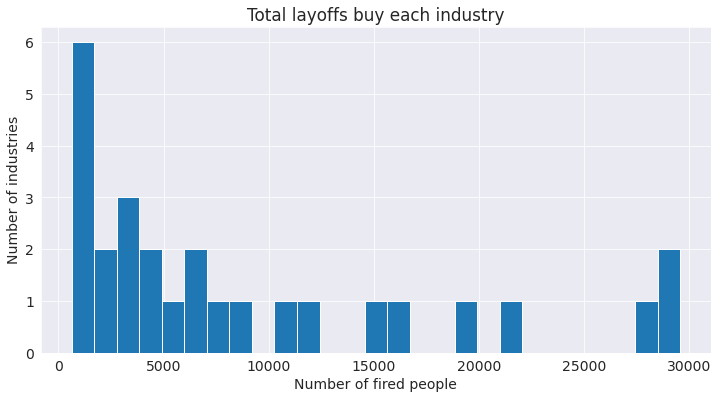

In [73]:
plt.title('Total layoffs buy each industry')
plt.xlabel('Number of fired people')
plt.ylabel('Number of industries')
plt.hist(layoffs_df.groupby('industry').total_laid_off.sum(), bins = 27);

This plot shows a number of laid off people in every country in dataset. The total number of layoffs in tech companies is 246753, and only in USA it's more than 160000 fired employees, that's more than half of a total number around the world.

In [74]:
layoffs_df.country.unique()

array(['United States', 'Germany', 'India', 'Israel', 'Brazil',
       'United Kingdom', 'Australia', 'Singapore', 'Indonesia',
       'Argentina', 'Mexico', 'Nigeria', 'Netherlands', 'Canada',
       'Switzerland', 'Egypt', 'Sweden', 'Ireland', 'Kenya', 'Luxembourg',
       'China', 'Spain', 'Estonia', 'Greece', 'Poland', 'Seychelles',
       'Norway', 'Belgium', 'Denmark', 'Hong Kong', 'New Zealand',
       'Malaysia', 'Hungary', 'Vietnam', 'Austria', 'Thailand', 'Romania',
       'Lithuania', 'Chile', 'Senegal', 'Pakistan',
       'United Arab Emirates', 'Colombia', 'Finland', 'Peru', 'Bahrain',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'France', 'Portugal',
       'South Africa', 'Czech Republic', 'Myanmar'], dtype=object)

In [75]:
layoffs_df.total_laid_off.sum()

246753.0

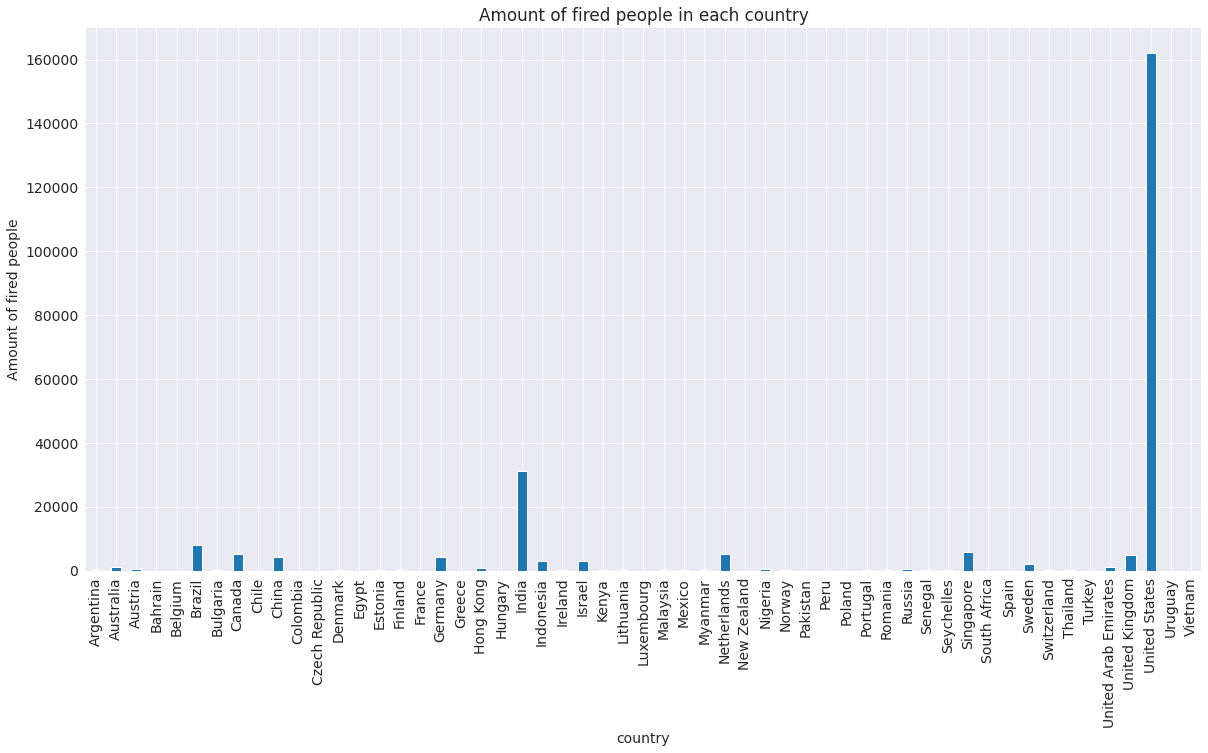

In [76]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
gd = layoffs_df.groupby('country').total_laid_off.sum()
gd.plot.bar()
plt.title('Amount of fired people in each country')
plt.ylabel('Amount of fired people');

This plot shows the dynamic how many people got fired by each year. From 2020 to 2021 it seems to decrease, but from 2021 to 2022 it increased significantly.

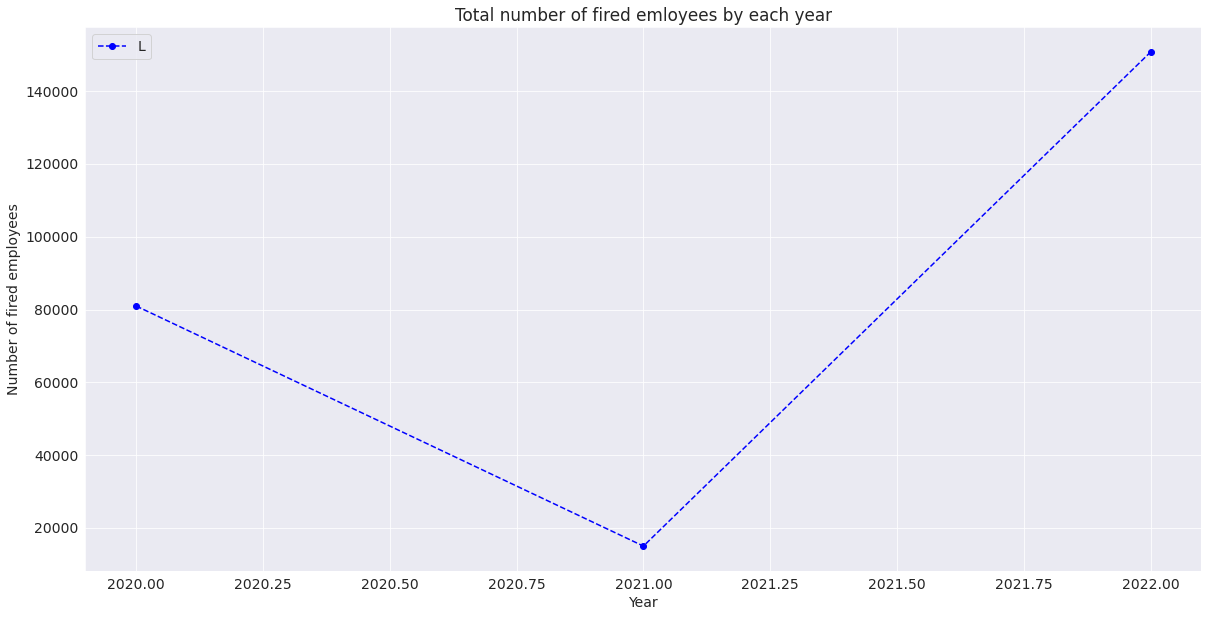

In [77]:
plt.plot(layoff_by_year, 'o--b')
plt.xlabel('Year')
plt.ylabel('Number of fired employees')
plt.title('Total number of fired emloyees by each year')
plt.legend('Layoff amount');

Let us save and upload our work to Jovian before continuing

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis


'https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis'

## Asking and Answering Questions

Here are some insights and questions that I found interesting during exploring this dataset. 



#### Q1: How likely is it that you would have been fired in the USA depending on the industry you worked in?

First, we have to find a total number of fired employees in USA.

In [80]:
sum_of_fired_usa = layoffs_df.groupby('country').total_laid_off.sum()
sum_of_fired_usa = sum_of_fired_usa.at['United States']
sum_of_fired_usa

162069.0

Using parameter `as_index = False` we can group two columns such as 'country' and 'industry' to calculate number of fired people in each industry in USA and then calculate the probability.

In [81]:
prob_get_fired_ind = layoffs_df.groupby(['country', 'industry'], as_index = False).total_laid_off.sum()
prob_get_fired_indus = prob_get_fired_ind.loc[232:258]['total_laid_off'] / sum_of_fired_usa

Using seaborn library we can see, that if you were working in 'Consumer' industry in the USA, most likely you would have been fired. Also 'Retail' and 'Transportation' industries are in high-risk group, so if you worked in these three industries, it's around 38% chance that you would have been fired.

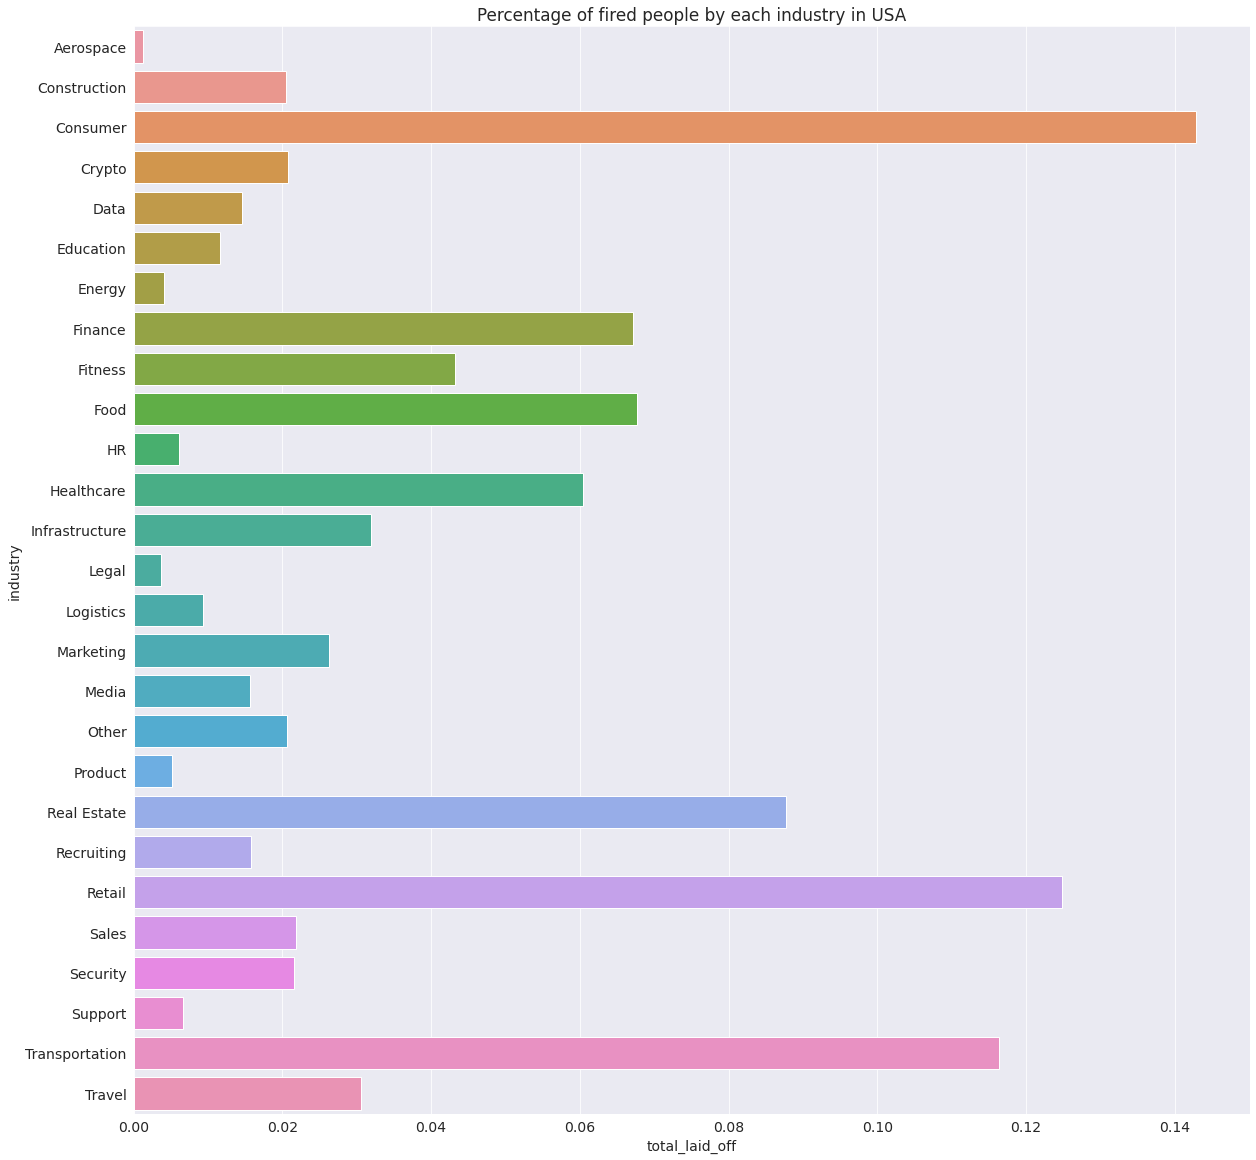

In [82]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
plt.title('Percentage of fired people by each industry in USA')
sns.barplot(y = prob_get_fired_ind.loc[232:258]['industry'], x = prob_get_fired_indus);

#### Q2: Which companies fired the most amount of people by number?

In order to get the names of the companies, let's use `.index` to get the indexes from `np.Series` type.

In [83]:
comp = layoffs_df.groupby('company').total_laid_off.sum()
comp = comp.sort_values(ascending = False).head(10)
comp.index

Index(['Meta', 'Amazon', 'Uber', 'Booking.com', 'Cisco', 'Peloton', 'Carvana',
       'Better.com', 'Bytedance', 'Twitter'],
      dtype='object', name='company')

To better understand how many people were fired by each company I use `seaborn` library. Top three companies: Meta, Amazon and Uber fired 11000, 10000, 7700 people correspondingly. 

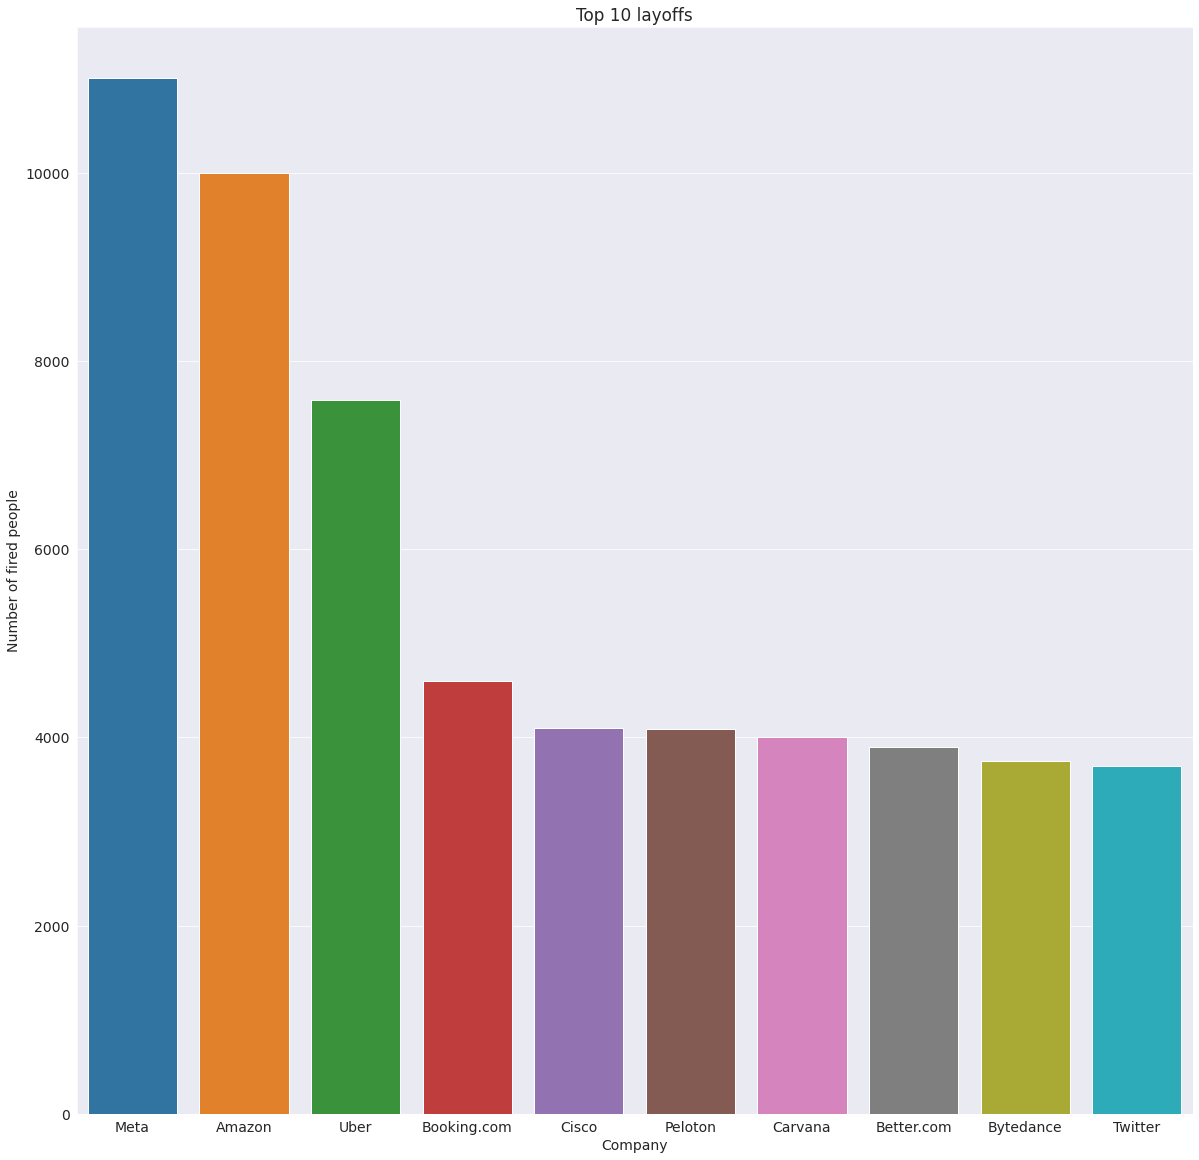

In [84]:
sns.barplot(x = comp.index, y = comp.sort_values(ascending = False).head(10))
plt.title('Top 10 layoffs')
plt.ylabel('Number of fired people')
plt.xlabel('Company');

In [85]:
perc = layoffs_df[layoffs_df.percentage_laid_off == 1.0]
perc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 14 to 1795
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              102 non-null    object        
 1   location             102 non-null    object        
 2   industry             102 non-null    object        
 3   total_laid_off       41 non-null     float64       
 4   percentage_laid_off  102 non-null    float64       
 5   date                 102 non-null    datetime64[ns]
 6   stage                102 non-null    object        
 7   country              102 non-null    object        
 8   funds_raised         86 non-null     float64       
 9   Year                 102 non-null    float64       
 10  Month                102 non-null    float64       
 11  Day                  102 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 10.4+ KB


Notice that there are 102 companies where percentage of laid off employees is 1.0, that basically means that these companies went bankrupt.

#### Q3: How many companies went bancrupt during each year?


Above we calculated the total number of bankrupt companies, but how many of them were gone in every year? To better see it let's use `.pie` plot.

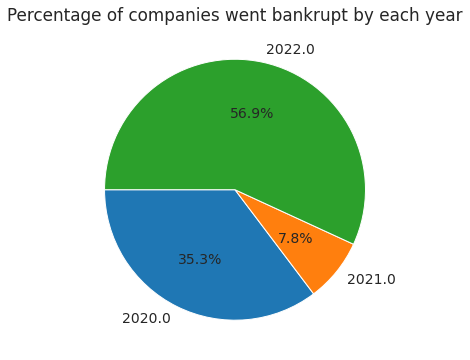

In [88]:
numb_of_comp = layoffs_df[layoffs_df.percentage_laid_off == 1.0].groupby('Year').company.count()
plt.figure(figsize=(12,6))
plt.title('Percentage of companies went bankrupt by each year')
plt.pie(numb_of_comp, labels = numb_of_comp.index, autopct = '%1.1f%%', startangle = 180);

So, in 2020 and 2022 were the most layoffs and the most number of bankrupt companies. As we can see, the more people got fired, the more companies gone bankrupt.

Here is a percentage of bankrupt companies to total number of companies.

In [89]:
tot_numb = numb_of_comp / layoffs_df.company.count()
tot_numb

Year
2020.0    0.019989
2021.0    0.004442
2022.0    0.032204
Name: company, dtype: float64

#### Q4: What are the top ten biggest companies in the dataset?

First, to avoid inf number when dividing on zero, let's replace all 0.0 on 1.0. It will not affect on the result.

In [33]:
layoffs_df.replace(0.0, 1.0, inplace = True)

Let's add new column `Amount_of_employees` where total number of employees will be stored. Then create a barplot for visualization.

In [34]:
layoffs_df['Amount_of_employees'] = layoffs_df.total_laid_off / layoffs_df.percentage_laid_off
layoffs_df.Amount_of_employees = layoffs_df.Amount_of_employees.round()
list_of_comp = layoffs_df.groupby('company').Amount_of_employees.sum()
list_of_comp = list_of_comp.sort_values(ascending = False).head(10)

The biggest company in dataset is 'Amazon' with more than 300000 of employees. The second biggest company 'Salesforce' is roughly twice as small as 'Amazon'.

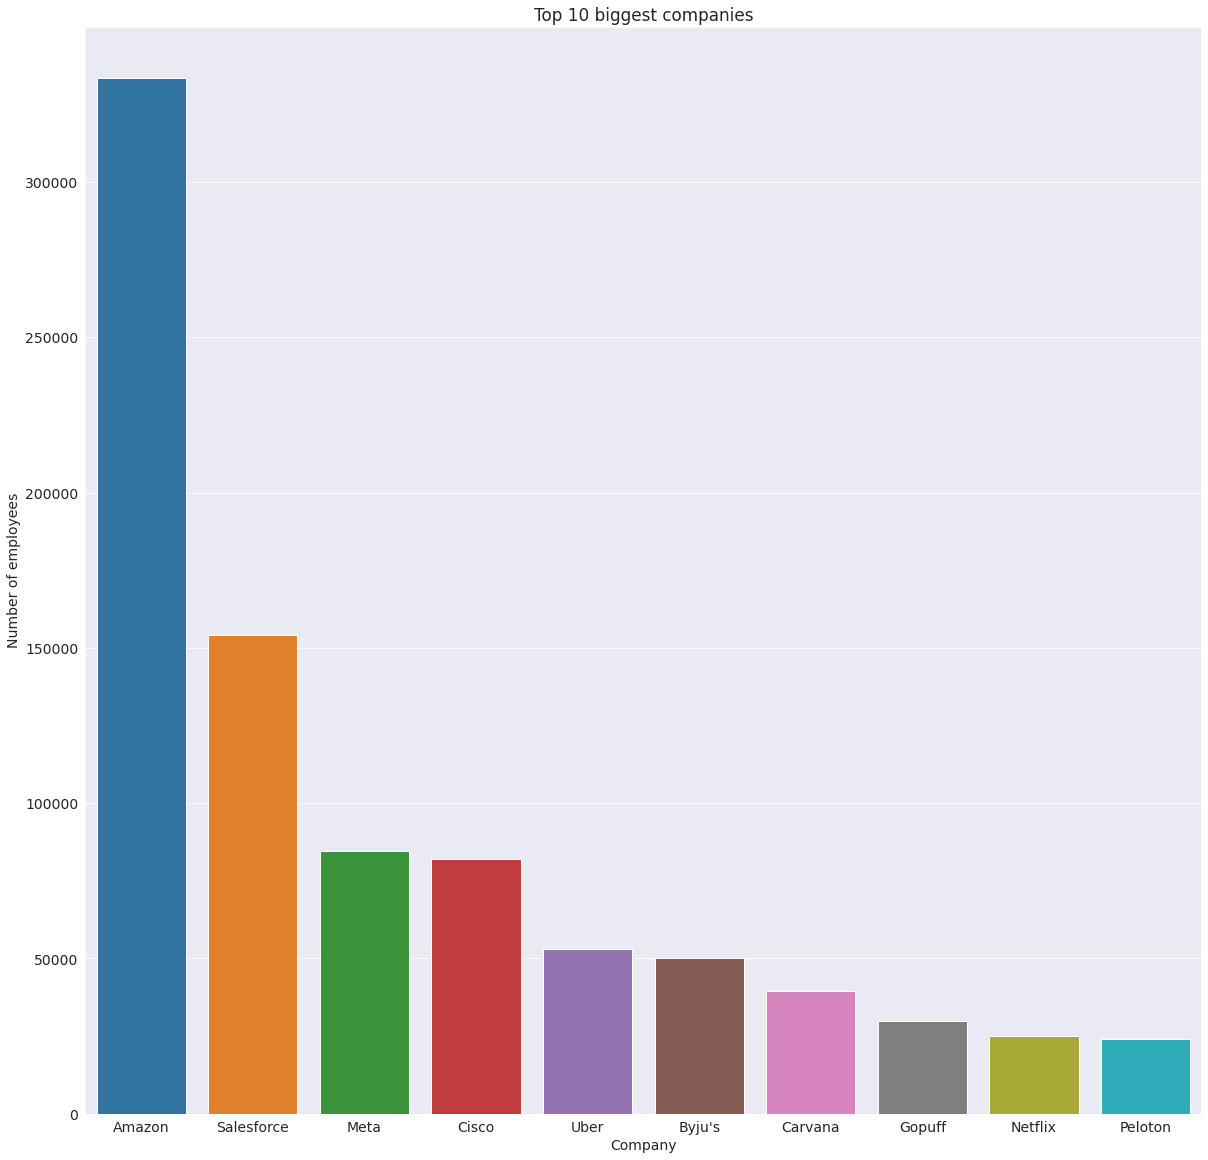

In [90]:
sns.barplot(x = list_of_comp.index, y = list_of_comp.sort_values(ascending = False).head(10))
plt.title('Top 10 biggest companies')
plt.ylabel('Number of employees')
plt.xlabel('Company');

#### Q5: What part of total number of companies didn't fire anyone?

Let's replace all 0.0 on 1.0 back.

In [91]:
layoffs_df.replace(1.0, 0.0, inplace = True)

In [95]:
comp_not_fire = layoffs_df[layoffs_df.percentage_laid_off == 0.0]
comp_not_fire = comp_not_fire.company.unique()
tot_numb = layoffs_df.company.unique()
tot_fract = len(comp_not_fire)/len(tot_numb)
print('The percentage of companies that didn\'t fire anyone is {:.1%}'.format(tot_fract), 'The number of companies that didn\'t fire anyone is {}'.format(len(comp_not_fire)),sep='\n')

The percentage of companies that didn't fire anyone is 6.8%
The number of companies that didn't fire anyone is 102


The total number of companies that didn't fire anyone is 102, that is 6.8% of total number of companies in dataset.

Let us save and upload our work to Jovian before continuing.

In [96]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

In conclusion, I have tried to cover all interesting insights that this dataset has using Numpy and Pandas libraries for calculation, handling columns and raws of the data frame, and Matplotlib and Seaborn libraries for visualization.  

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis


'https://jovian.ai/080399ivan/tech-layoffs-from-covid-19-to-presentd-data-analysis'

## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Kaggle datasets: https://www.kaggle.com/datasets?fileType=csv
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets
- Notebook from Jovian.ai: https://jovian.ai/aakashns/python-eda-stackoverflow-survey

